In [18]:
import azureml

In [19]:
from azureml.core import Workspace
workspaces = Workspace.list("3165a1c1-fd45-4c8d-938e-0058c823f960")
ws = workspaces["aml-playground"]
playground_ws = ws[0]
playground_ws

Workspace.create(name='aml-playground', subscription_id='3165a1c1-fd45-4c8d-938e-0058c823f960', resource_group='aml-playground')

In [8]:
from dataclasses import dataclass, asdict

@dataclass
class Foo:
    bar: int = 123
    ham: bool = False


@dataclass
class OwnerClass:
    foo1 = Foo()
    other_param = 321


owner_class = OwnerClass()
print(asdict(owner_class.foo1))
print(asdict(owner_class))

{'bar': 123, 'ham': False}
{}


## MLFlow

In [1]:
import mlflow

## Construct AzureML MLFLOW TRACKING URI
def get_azureml_mlflow_tracking_uri(region, subscription_id, resource_group, workspace):
    return "azureml://{}.api.azureml.ms/mlflow/v1.0/subscriptions/{}/resourceGroups/{}/providers/Microsoft.MachineLearningServices/workspaces/{}".format(region, subscription_id, resource_group, workspace)

region='northeurope' ## example: westus
subscription_id = '3165a1c1-fd45-4c8d-938e-0058c823f960' ## example: 11111111-1111-1111-1111-111111111111
resource_group = 'aml-playground' ## example: myresourcegroup
workspace = 'aml-playground' ## example: myworkspacename

MLFLOW_TRACKING_URI = get_azureml_mlflow_tracking_uri(region, subscription_id, resource_group, workspace)

## Set the MLFLOW TRACKING URI
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

## Make sure the MLflow URI looks something like this: 
## azureml://<REGION>.api.azureml.ms/mlflow/v1.0/subscriptions/<SUBSCRIPTION_ID>/resourceGroups/<RESOURCE_GROUP>/providers/Microsoft.MachineLearningServices/workspaces/<AML_WORKSPACE_NAME>

print("MLFlow Tracking URI:", MLFLOW_TRACKING_URI)

MLFlow Tracking URI: azureml://northeurope.api.azureml.ms/mlflow/v1.0/subscriptions/3165a1c1-fd45-4c8d-938e-0058c823f960/resourceGroups/aml-playground/providers/Microsoft.MachineLearningServices/workspaces/aml-playground


In [5]:
# Set the experiment name
experiment_name = '100k_experiment'
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='', experiment_id='71ee7d1e-bfe3-4bd3-9fd7-ee8dac02e15b', lifecycle_stage='active', name='experiment_with_mlflow', tags={}>

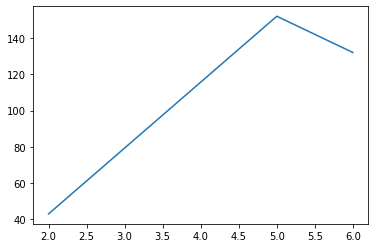

In [2]:
import matplotlib.pyplot as plt

plt.plot([2, 5, 6], [43, 152, 132])
plt.savefig("artifacts/mock_plot.png")

In [15]:
import pprint

hyperparams = {
    "n_steps": 1024,  # 6144,
    "learning_rate": 1e-5,
    "batch_size": 1024,
    "gae_lambda": 0.95,
    "gamma": 0.999,
    "n_epochs": 4,
    "clip_range": 0.2,
    "ent_coef": 0.01,
    "verbose": 2
}

print(pprint.pformat(hyperparams))



{'batch_size': 1024,
 'clip_range': 0.2,
 'ent_coef': 0.01,
 'gae_lambda': 0.95,
 'gamma': 0.999,
 'learning_rate': 1e-05,
 'n_epochs': 4,
 'n_steps': 1024,
 'verbose': 2}


In [6]:
import os
from random import random

# Make a mock mlflow run





with mlflow.start_run() as mlflow_run:
    mlflow.log_param("hello_param", "world")
    mlflow.log_param("hyperparams", hyperparams)
    mlflow.log_metric("hello_metric", random())
    os.system(f"echo 'hello hey hello world' > helloworld.txt")
    mlflow.log_artifact("helloworld.txt")
    mlflow.log_artifact("artifacts/mock_plot.png")

In [45]:
from mlflow.tracking import MlflowClient

# Use MlFlow to retrieve the run that was just completed
client = MlflowClient()
run_id = mlflow_run.info.run_id
finished_mlflow_run = MlflowClient().get_run(run_id)

metrics = finished_mlflow_run.data.metrics
tags = finished_mlflow_run.data.tags
params = finished_mlflow_run.data.params

print(metrics,tags,params)

{'hello_metric': 0.7127628508372319} {'mlflow.user': 'krisbrud', 'mlflow.source.name': '/home/krisbrud/anaconda3/envs/aml-playground/lib/python3.7/site-packages/ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.rootRunId': 'f1b83440-0946-48c5-baa1-f1c4e75a5c28'} {'hello_param': 'world'}


In [46]:
client.list_artifacts(run_id)

[<FileInfo: file_size=-1, is_dir=False, path='helloworld.txt'>]

In [47]:
client.download_artifacts(run_id, "helloworld.txt", "./artifacts")

'/home/krisbrud/repos/aml-playground/artifacts/helloworld.txt'

In [49]:
from mlflow.entities import ViewType

all_experiments = [exp.experiment_id for exp in MlflowClient().list_experiments()]
query = "metrics.hello_metric > 0"
runs = mlflow.search_runs(experiment_ids=all_experiments, filter_string=query, run_view_type=ViewType.ALL)

runs.head(10)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.hello_metric,params.hello_param,params.hyperparams,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.rootRunId,tags.mlflow.source.name
0,e606cdd5-bad0-43ff-bea6-cc89f8ae0cac,71ee7d1e-bfe3-4bd3-9fd7-ee8dac02e15b,FINISHED,,2022-02-22 12:56:21.835000+00:00,2022-02-22 12:56:26.116000+00:00,0.040390,world,None,krisbrud,LOCAL,e606cdd5-bad0-43ff-bea6-cc89f8ae0cac,/home/krisbrud/anaconda3/envs/aml-playground/l...
1,bf808862-5178-4bcf-a12d-e6a5f1fef3ab,71ee7d1e-bfe3-4bd3-9fd7-ee8dac02e15b,FINISHED,,2022-02-22 12:57:15.407000+00:00,2022-02-22 12:57:17.423000+00:00,0.996726,world,None,krisbrud,LOCAL,bf808862-5178-4bcf-a12d-e6a5f1fef3ab,/home/krisbrud/anaconda3/envs/aml-playground/l...
2,f1b83440-0946-48c5-baa1-f1c4e75a5c28,71ee7d1e-bfe3-4bd3-9fd7-ee8dac02e15b,FINISHED,,2022-02-22 13:00:12.706000+00:00,2022-02-22 13:00:16.264000+00:00,0.712763,world,None,krisbrud,LOCAL,f1b83440-0946-48c5-baa1-f1c4e75a5c28,/home/krisbrud/anaconda3/envs/aml-playground/l...
3,9cd65741-558d-4ff9-85f7-61e7bf7ce4e5,71ee7d1e-bfe3-4bd3-9fd7-ee8dac02e15b,FINISHED,,2022-02-22 13:03:04.422000+00:00,2022-02-22 13:03:08.549000+00:00,0.925580,world,"{'n_steps': 1024, 'learning_rate': 1e-05, 'bat...",krisbrud,LOCAL,9cd65741-558d-4ff9-85f7-61e7bf7ce4e5,/home/krisbrud/anaconda3/envs/aml-playground/l...


In [51]:
# the model folder produced from a run is registered. This includes the MLmodel file, model.pkl and the conda.yaml.
model_path = "helloworld.txt"
model_uri = 'runs:/{}/{}'.format(run_id, model_path) 
mlflow.register_model(model_uri,"registered_model_name")

Registered model 'registered_model_name' already exists. Creating a new version of this model...
2022/02/22 14:32:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: registered_model_name, version 1
Created version '1' of model 'registered_model_name'.


<ModelVersion: creation_timestamp=1645536759049, current_stage='None', description='', last_updated_timestamp=1645536759049, name='registered_model_name', run_id='f1b83440-0946-48c5-baa1-f1c4e75a5c28', run_link='', source='azureml://experiments/experiment_with_mlflow/runs/f1b83440-0946-48c5-baa1-f1c4e75a5c28/artifacts/helloworld.txt', status='READY', status_message='', tags={}, user_id='', version='1'>

## Run experiment

In [20]:
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

# Choose a name for your cluster.
cluster_name = "play-cpu-cluster"
# instance_name = "cpuinstance1"
# cluster_name = instance_name


try:
    compute_target = ComputeTarget(workspace=playground_ws, name=cluster_name)
    print('Found existing compute target.')
except ComputeTargetException:
    print('Creating a new compute target...')
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_DS3_V2',
                                                           max_nodes=1)

    # Create the cluster.
    compute_target = ComputeTarget.create(playground_ws, cluster_name, compute_config)

    compute_target.wait_for_completion(show_output=True)

# Use get_status() to get a detailed status for the current AmlCompute.
print(compute_target.get_status().serialize())

Found existing compute target.
{'currentNodeCount': 0, 'targetNodeCount': 0, 'nodeStateCounts': {'preparingNodeCount': 0, 'runningNodeCount': 0, 'idleNodeCount': 0, 'unusableNodeCount': 0, 'leavingNodeCount': 0, 'preemptedNodeCount': 0}, 'allocationState': 'Steady', 'allocationStateTransitionTime': '2022-02-23T14:39:35.592000+00:00', 'errors': None, 'creationTime': '2022-02-18T13:52:07.329227+00:00', 'modifiedTime': '2022-02-18T13:52:11.078251+00:00', 'provisioningState': 'Succeeded', 'provisioningStateTransitionTime': None, 'scaleSettings': {'minNodeCount': 0, 'maxNodeCount': 1, 'nodeIdleTimeBeforeScaleDown': 'PT1800S'}, 'vmPriority': 'Dedicated', 'vmSize': 'STANDARD_DS3_V2'}


In [22]:
from azureml.core import ScriptRunConfig
from azureml.core.environment import Environment as AmlEnvironment

auv_docker_env = AmlEnvironment.from_docker_image("gym_env_second", "krisbrud.azurecr.io/gym-auv")
experiment_name = "reduced_observation_vector_elevator_pid"


src = ScriptRunConfig(source_directory='../gym-auv',
                      script='train3d.py',
                      arguments=["--timesteps", int(30e6), 
                                 "--mlflow_tracking_uri", "azureml://northeurope.api.azureml.ms/mlflow/v1.0/subscriptions/3165a1c1-fd45-4c8d-938e-0058c823f960/resourceGroups/aml-playground/providers/Microsoft.MachineLearningServices/workspaces/aml-playground",
                                 "--exp_id", experiment_name],
                      compute_target=compute_target,
                      environment=auv_docker_env)



In [23]:
from azureml.core import Experiment

run = Experiment(playground_ws, experiment_name).submit(src)
run.wait_for_completion(show_output=True)


RunId: reduced_observation_vector_elevator_pid_1646055118_fdb3daa0
Web View: https://ml.azure.com/runs/reduced_observation_vector_elevator_pid_1646055118_fdb3daa0?wsid=/subscriptions/3165a1c1-fd45-4c8d-938e-0058c823f960/resourcegroups/aml-playground/workspaces/aml-playground&tid=09a10672-822f-4467-a5ba-5bb375967c05

Execution Summary
RunId: reduced_observation_vector_elevator_pid_1646055118_fdb3daa0
Web View: https://ml.azure.com/runs/reduced_observation_vector_elevator_pid_1646055118_fdb3daa0?wsid=/subscriptions/3165a1c1-fd45-4c8d-938e-0058c823f960/resourcegroups/aml-playground/workspaces/aml-playground&tid=09a10672-822f-4467-a5ba-5bb375967c05



{'runId': 'reduced_observation_vector_elevator_pid_1646055118_fdb3daa0',
 'target': 'play-cpu-cluster',
 'status': 'Completed',
 'startTimeUtc': '2022-02-28T13:34:03.473396Z',
 'endTimeUtc': '2022-03-01T03:45:22.482632Z',
 'services': {},
 'properties': {'_azureml.ComputeTargetType': 'amlcompute',
  'ContentSnapshotId': '70df7152-a118-420e-8811-b0f2559d2feb',
  'azureml.git.repository_uri': 'git@gitlab.stud.idi.ntnu.no:krisbrud/gym-auv.git',
  'mlflow.source.git.repoURL': 'git@gitlab.stud.idi.ntnu.no:krisbrud/gym-auv.git',
  'azureml.git.branch': '9-fix-observations',
  'mlflow.source.git.branch': '9-fix-observations',
  'azureml.git.commit': '30a878c5bf5710e3c49b7edc8eb00951d2ef2e67',
  'mlflow.source.git.commit': '30a878c5bf5710e3c49b7edc8eb00951d2ef2e67',
  'azureml.git.dirty': 'True',
  'ProcessInfoFile': 'azureml-logs/process_info.json',
  'ProcessStatusFile': 'azureml-logs/process_status.json'},
 'inputDatasets': [],
 'outputDatasets': [],
 'runDefinition': {'script': 'train3d.py

In [ ]:

from azureml.tensorboard.export import export_to_tensorboard
import os

logdir = 'exported_tb_logs'
log_path = os.path.join(os.getcwd(), logdir)
try:
    os.stat(log_path)
except os.error:
    os.mkdir(log_path)
print(logdir)

# export run history for the project
export_to_tensorboard(run, logdir) # doesn't currently work?

# 